<a href="https://colab.research.google.com/github/ParkJeongUng/Ung.github.io/blob/master/_notebooks/PolynomialFeatures_%EB%A6%BF%EC%A7%80_Ridge_%EB%9D%BC%EC%8F%98_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PolynomialFeatures // 릿지 Ridge // 라쏘 Lasso
1. 특성공학 --> 기존의 특성을 사용해 새로운 특성을 만든다 --> ex) 농어 길이 * 농어 두께
2. 다중 회귀는 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것이다.
3. 규제 --> 모델이 train 세트를 너무 과도하게 학습하지 못하도록 하는것

In [ ]:
# 판다스로 데이터 준비
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')

# 판다스로 준비된 데이터 넘파이 배열로 바꾸기 --> to_numpy()
perch_full = df.to_numpy()

import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# 판다스로 준비된 데이터 train test split
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

## PolynomialFeatures
*  사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다.

In [ ]:
# PolynomialFeatures --> 각 특성을 제곱한 항과 특성끼리 곱한 항을 추가한다.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

poly = PolynomialFeatures(include_bias = False) # include_bias = False 로 배열에서 1을 제거한다. 사실 굳이 지정하지 않아도 사이킷런 모델은 1을 무시함. 문과라 평면을 안배워서 뭔말인지 잘모르겠으니까 스킵
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

# PolynomialFeatures 적용
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
print(train_input.shape)

[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]
(42, 9)
(42, 3)


In [ ]:
# PolynomialFeatures 로 9개의 특성이 어떻게 만들어졌는지 확인 --> get_feature_names()
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
test_poly = poly.transform(test_input)

# 다중 회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 여러개의 특성을 사용하니 과소적합도 해결되고 점수도 좋게 나온다.

0.9903183436982124
0.9714559911594132


In [ ]:
# 특성 갯수 추가하기 --> degree 매개변수로 고차항의 최대 차수 지정 가능
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape) # 특성이 55개

# 추가된 특성으로 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) # 거의 완벽한 점수
print(lr.score(test_poly, test_target)) # 음수? --> 특성을 너무 많이 늘리면 train 세트에 과대적합 되므로 테스트 세트의 점수가 굉장히 낮게 나온다.

(42, 55) (14, 55)
0.9999999999991096
-144.40579242335605


## 규제
* 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것 --> 훈련세트에 과대적합되지 않도록 하는 것
* 선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일

In [ ]:
# 특성 스케일링 --> StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 라쏘 // 선형 회귀 모델에 규제를 추가한 모델
1. 릿지 회귀 --> 계수를 제곱한 값을 기준으로 규제를 적용
2. 라쏘 회귀 --> 계수의 절댓값을 기준으로 규제를 적용

In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

# 많은 특성을 사용했는데도 train세트에 너무 과대적합되지 않음

0.9896101671037343
0.9790693977615398


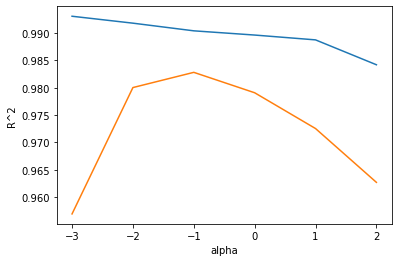

In [ ]:
# alpha 매개변수를 이용해 규제의 강도 조절
# alpha 와 같이 사람이 직접 알려줘야 하는 파라미터를 "하이퍼파라미터" 라고 한다.
# 적절한 alpha 값 찾는 방법 --> alpha 값에 대한 R^2 그래프 그리기 --> train세트와 test세트의 점수가 가장 가까운 지점이 최적의 alpha값

import matplotlib.pyplot as plt

# 리스트 만들기
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

# 반복문으로 alpha 값 돌리기
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# train 스코어가 가장 높고 test 세트의 점수가 가장 높은 -1 = 10^-1 = 0.1 --> alpha = 0.1로 하여 최종 모델을 훈련해야 가장 좋은 모델 

In [ ]:
# alpha = 0.1 인 모델 훈련
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


In [ ]:
# 적절한 alpha 값 찾기
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939808, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475122, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926333242, tolerance: 518.2793833333334
  positive)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


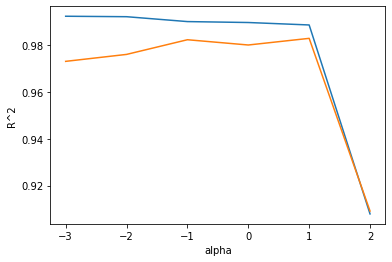

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 10000) # 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데 지정한 횟수가 부족할 때 이런 경고가 발생 --> max_iter 를 늘려줌으로써 해결
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 최적의 알파값은 1 = 10 --> alpha = 10 으로 하여 모델 훈련

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
# 라쏘 모델은 특성의 계수를 0으로 만들기도 한다.
# 라쏘 모델의 계수는 coef_ 에 저장되어 있다.

print(lasso.coef_)

# np.sum 은 배열을 모두 더한 값을 반환한다
# 넘파이 배열에 비교연산자를 사용하면 각 원소는 True = 1 아니면 False = 0 가 된다.
print(np.sum(lasso.coef_ == 0))

# 총 55개의 특성 중 40개의 특성의 계수를 0으로 만듬 --> 15개의 특성만 사용

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
40


## 연습

0.9999999999991096
-144.40579242335605
0.9896101671037343
0.9790693977615398


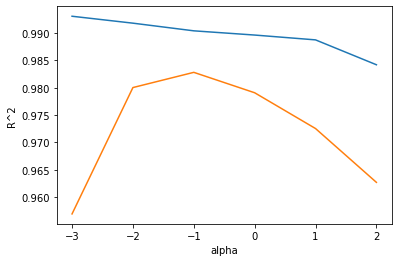

0.9897898972080961
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939808, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475122, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926333242, tolerance: 518.2793833333334
  positive)


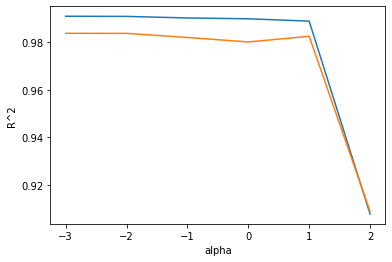

In [ ]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')

perch_full = df.to_numpy()

import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

train_score = []
test_score = []
import matplotlib.pyplot as plt

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()